In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np

In [2]:
!pip install requests
!pip install tabulate
!pip install "colorama >= 0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
!pip install h2o-wave


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 17.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 11.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.7 MB/s eta 0:00:00
Using cached h11-0.14.0-py3-none-any.whl (58 kB)


In [18]:
# Load data
df = pd.read_csv("/Users/qianlou/Documents/GitHub/Customer-Personality-Analysis-2.0/Data/Preprocessed Data/Final Preprocessed Data.csv")

# Columns to keep
columns_to_keep = [
    "Income_Category_High",
    "Income_Category_Low",
    "Income_Category_Medium",
    "Complain",
    "Is_Parent",
    "Family_Size",
    "Recency",
    "Age",
    "Member_Year",
    "Total_purchase",
    "NumWebVisitsMonth",
    "NumDealsPurchases",
    "Cmp_Attitude",
    "Education_Basic",
    "Education_Graduation",
    "Education_Master",
    "Education_PhD",
    "Marital_Status_Alone",
    "Marital_Status_Divorced",
    "Marital_Status_Married",
    "Marital_Status_Single",
    "Marital_Status_Together",
    "Marital_Status_Widow",
    "Marital_Status_YOLO"
]

In [19]:
# Filter the DataFrame to keep selected columns
df = df[columns_to_keep]

# Define the target variable
target = 'Total_purchase'  # Assuming 'Total_purchase' is the target variable
features = df.columns.drop(target)

# Splitting the data into train, test, and validation sets
train, test = train_test_split(df, test_size=0.4, random_state=42)
test, validation = train_test_split(test, test_size=0.5, random_state=42)

In [20]:
# Initialize H2O
h2o.init()

# Convert DataFrame to H2OFrame
hf = h2o.H2OFrame(df)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 34 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_qianlou_x7pq4z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.732 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
# Splitting the H2O Frame into train, test, and validation
train_hf, test_hf = hf.split_frame(ratios=[0.6], seed=1)
test_hf, val_hf = test_hf.split_frame(ratios=[0.5], seed=1)

In [22]:
# Set up and run H2O AutoML
aml = H2OAutoML(max_models=12, seed=1, exclude_algos=["StackedEnsemble"], verbosity="info")
aml.train(x=features.tolist(), y=target, training_frame=train_hf)


AutoML progress: |
11:10:29.623: Project: AutoML_2_20240426_111029
11:10:29.623: 5-fold cross-validation will be used.
11:10:29.623: Setting stopping tolerance adaptively based on the training frame: 0.02711630722733202
11:10:29.623: Build control seed: 1
11:10:29.623: training frame: Frame key: AutoML_2_20240426_111029_training_py_18_sid_98d0    cols: 24    rows: 1360  chunks: 1    size: 14966  checksum: -6620537956258396361
11:10:29.623: validation frame: NULL
11:10:29.623: leaderboard frame: NULL
11:10:29.623: blending frame: NULL
11:10:29.623: response column: Total_purchase
11:10:29.623: fold column: null
11:10:29.623: weights column: null
11:10:29.624: AutoML: XGBoost is not available; skipping it.
11:10:29.624: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20240426_111029


GLM Model: summary
    family    link      regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    gaussian  identity  Ridge ( lambda = 3.034E-4 )  nlambda = 30, lambda.max = 303.37, lambda.min = 3.034E-4, lambda.1se = 0.05726  26                            26                             30                      AutoML_2_20240426_111029_training_py_18_sid_98d0

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 26.27309080003696
RMSE: 5.125728318984236
MAE: 4.019402416593447
RMSLE: NaN
Mean Residual Deviance: 26.27309080003696
R^2: 0.4801827873786668
Null degrees of freedom: 1359
Residual degrees of freedom: 1333
Null deviance: 68738.40000000026
Residual deviance: 35731.403488050266
AIC: 8360.734352897913

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 27.08725375058156
RMSE: 5.204541646541179
MAE: 4.085586601496526
RMSLE: NaN
Mean Residual Deviance: 27.08725375058156
R^2: 0.46407444600411263
Null degrees of freedom: 1359
Residual degrees of freedom: 1335
Null deviance: 68891.05009191175
Residual deviance: 36838.665100790924
AIC: 8398.238865586316

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     1723.03   13.1101    1745.42       1713.5        1718.36       1723.41       1714.47
loglikelihood           0         0          0             0             0             0             0
mae                     4.08316   0.121738   4.25849       4.15969       4.03122       3.9844        3.98201
mean_residual_deviance  27.0176   1.4852     29.6048       26.1334       26.41         26.9048       26.0348
mse                     27.0176   1.4852     29.6048       26.1334       26.41         26.9048       26.0348
null_deviance           13778.2   633.026    14200.6       14045.3       14423.8       12960.4       13260.9
r2                      0.462603  0.0327687  0.43051       0.493885      0.5004        0.434779      0.453443
residual_deviance       7348.78   403.973    8052.51       7108.29       7183.52       7318.09       7081.47
rmse                    5.19632   0.140676   5.44103       5.11209       5.13907       5.18698       5.10243
rmsle                   0.455191  0.0345975  0.450481      nan           0.434956      0.429927      0.505401

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_xval       deviance_se         alpha    iterations    training_rmse      training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  ------------------  -------  ------------  -----------------  -------------------  -----------------  ------------------
     2024-04-26 11:10:30  0.000 sec   1            .3E3      27            50.35468749699798   50.50764342189528   1.0397352721878192  0.0
     2024-04-26 11:10:30  0.000 sec   2            .19E3     27            50.24137404109835   50.41861534608773   1.0390876646667533  0.0
     2024-04-26 11:10:30  0.001 sec   3            .12E3     27            50.061325677827206  50.27680265233516   1.0380437613853286  0.0
     2024-04-26 11:10:30  0.002 sec   4            .73E2     27            49.7775255

In [23]:
# Display the leaderboard
lb = aml.leaderboard
print(lb.head())


model_id                                                 rmse      mse      mae       rmsle    mean_residual_deviance
GLM_1_AutoML_2_20240426_111029                        5.20454  27.0873  4.08559  nan                          27.0873
DeepLearning_grid_1_AutoML_2_20240426_111029_model_1  5.21325  27.178   4.01769  nan                          27.178
GBM_grid_1_AutoML_2_20240426_111029_model_2           5.24823  27.5439  4.04151    0.448927                   27.5439
GBM_4_AutoML_2_20240426_111029                        5.25762  27.6426  4.01597    0.447                      27.6426
GBM_2_AutoML_2_20240426_111029                        5.26783  27.75    4.0348     0.448095                   27.75
DeepLearning_1_AutoML_2_20240426_111029               5.27156  27.7893  4.11543  nan                          27.7893
GBM_3_AutoML_2_20240426_111029                        5.28711  27.9535  4.02725    0.448603                   27.9535
GBM_5_AutoML_2_20240426_111029                        5.318

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 26.95140612295922
RMSE: 5.191474368901306
MAE: 4.046113272188663
RMSLE: 0.4480084266854187
Mean Residual Deviance: 26.95140612295922
R^2: 0.48278568166257896
Null degrees of freedom: 433
Residual degrees of freedom: 407
Null deviance: 22644.839999999964
Residual deviance: 11696.910257364301
AIC: 2717.250041341064


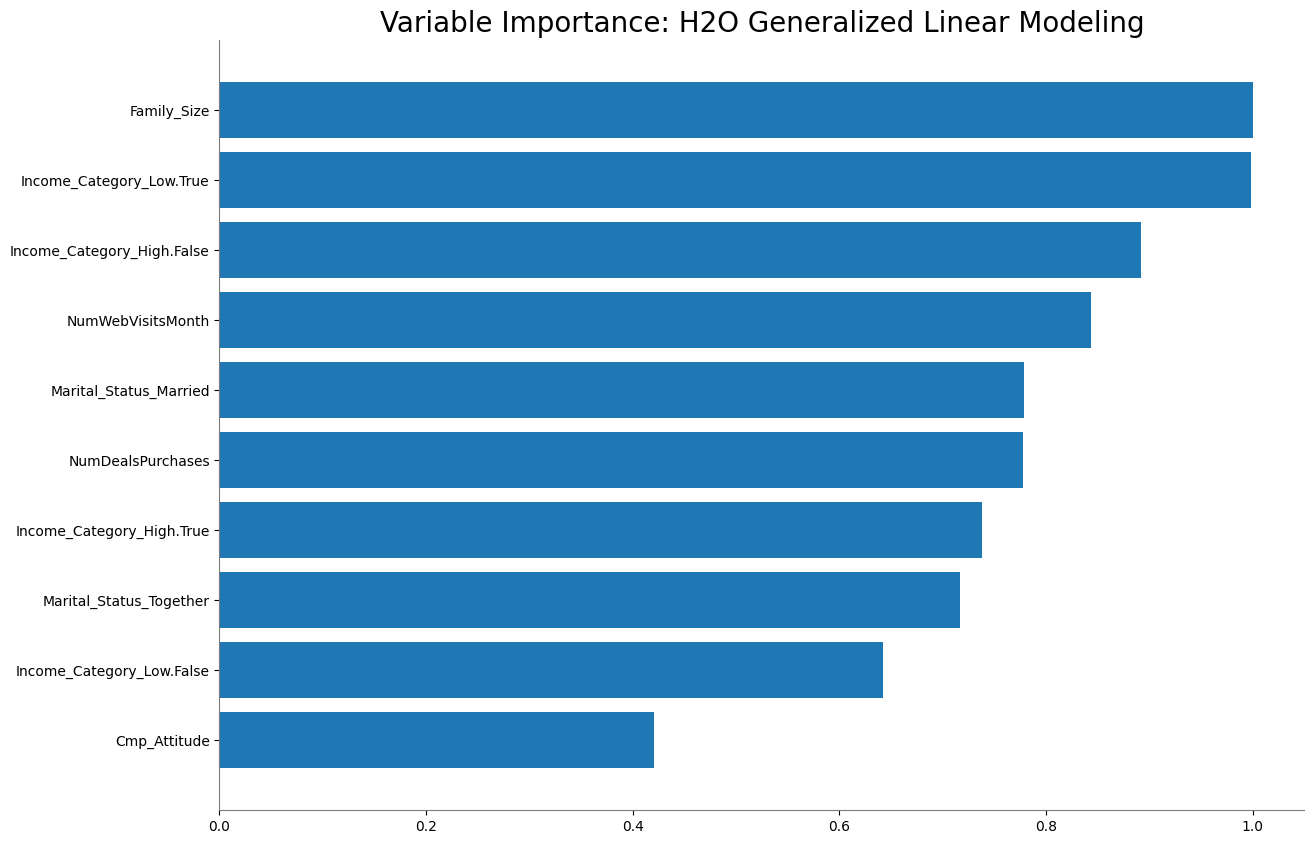

<Figure size 640x480 with 0 Axes>

In [24]:
# Get the best model
best_model = aml.leader

# Model performance and variable importance plots
performance = best_model.model_performance(test_hf)
print(performance)
best_model.varimp_plot()